In [1]:
!ls

classification_model.py  resnet50_feature_extractor.py	task_b.py
features		 task_a.ipynb			visualization.ipynb
models			 task_a.py


In [2]:
!ls features

test_features_resnet50.pkl  train_features_resnet50.pkl


In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import umap
import os
import cv2
from tqdm import tqdm
import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
!ls ../MIT_split

test			   test_labels.dat  train_images_filenames.dat
test_images_filenames.dat  train	    train_labels.dat


In [5]:
DATASET = '../MIT_split'
BATCH_SIZE = 1

# Dataset Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Folders
train_dataset = torchvision.datasets.ImageFolder(os.path.join(DATASET,'train'), transform=transform)
test_dataset = torchvision.datasets.ImageFolder(os.path.join(DATASET,'test'), transform=transform)

# Paths map(list, zip(*lot))
train_images, train_labels = map(list, zip(*[(path, label) for path, label in train_dataset.imgs]))
test_images, test_labels = map(list, zip(*[(path, label) for path, label in test_dataset.imgs]))

# Load Images
train_images = np.array([cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in tqdm(train_images)])
test_images = np.array([cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in tqdm(test_images)])

100%|████████████████████████████████████████████████████████████| 807/807 [00:00<00:00, 1210.92it/s]


In [6]:
len(train_images), len(test_images), len(train_labels), len(test_labels)

(1881, 807, 1881, 807)

In [7]:
def get_embeddings(file,):
    
    with open(file, 'rb') as f:
        features = pickle.load(f)

    features = [np.squeeze(fe) for fe in features]
    print (len(features)) # batches

    embed = []
    for fe in features:
        for sample in fe:
            #print (sample.shape)
            if np.squeeze(sample).shape == (2048,):
                embed.append(np.squeeze(sample))

    embed = np.array(embed)
    #embed.shape
    return embed

In [8]:
test_embd   = get_embeddings('features/test_features_resnet50.pkl')
test_target = test_labels

101


In [18]:
train_embd   = get_embeddings('features/train_features_resnet50.pkl')
train_target = train_labels[:1880]

236


In [19]:
test_embd.shape, len(test_target), train_embd.shape, len(train_target)

((807, 2048), 807, (1880, 2048), 1880)

In [20]:
## UMAP

In [21]:
train_umap = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(train_embd)

In [22]:
train_umap.shape

(1880, 2)

In [36]:
set(train_target)

{0, 1, 2, 3, 4, 5, 6, 7}

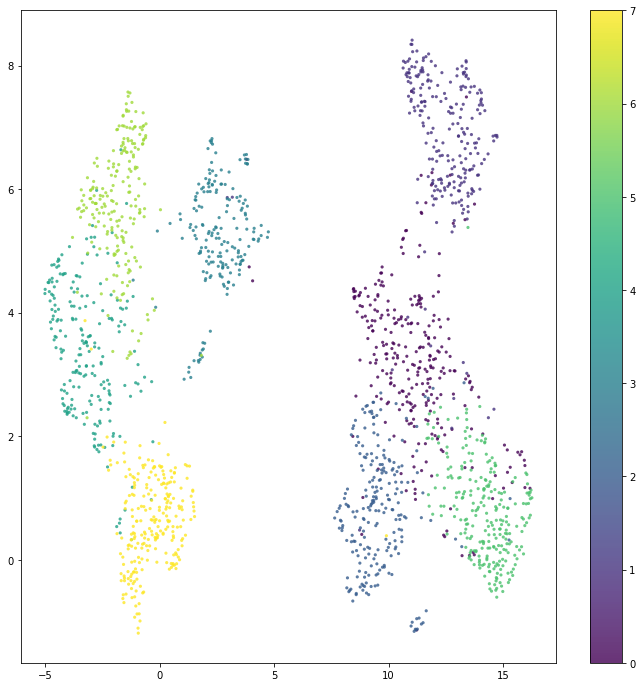

In [47]:
plt.figure(figsize=(12,12))
plt.scatter(train_umap[:, 0], train_umap[:, 1], 
            c=train_target, 
            label=train_target, 
            edgecolor='none', 
            alpha=0.80, 
            s=10)

plt.colorbar()
#plt.legend(labels=set(train_target))
#plt.axis('off');

In [48]:
## TSNE

In [49]:
from sklearn.manifold import TSNE # TSNE module

In [50]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
train_tsne = tsne.fit_transform(train_embd)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1880 samples in 0.002s...
[t-SNE] Computed neighbors for 1880 samples in 0.147s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1880
[t-SNE] Computed conditional probabilities for sample 1880 / 1880
[t-SNE] Mean sigma: 4.255467
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.713799
[t-SNE] KL divergence after 2000 iterations: 1.072145


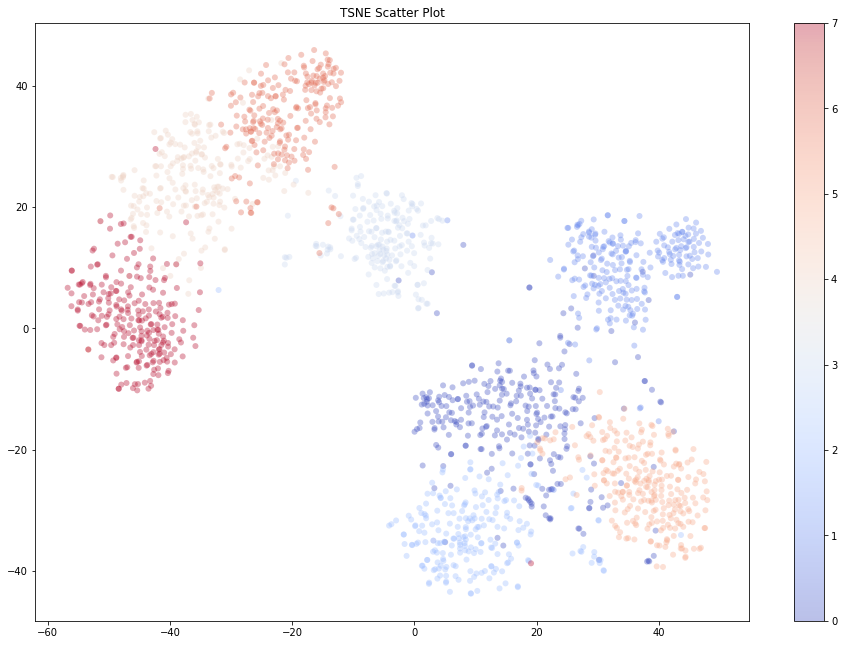

In [51]:
plt.figure(figsize = (16,11))
plt.scatter(train_tsne[:,0],train_tsne[:,1],  c = train_target, label=train_target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
#plt.legend(set(train_target))
plt.title('TSNE Scatter Plot')
plt.show()